In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv("./iris.csv")

In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
data.drop("Id", axis='columns', inplace=True)

In [19]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
scaler=MinMaxScaler()
data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]=scaler.fit_transform(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

In [21]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [22]:
x=data.drop("Species", axis='columns')

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


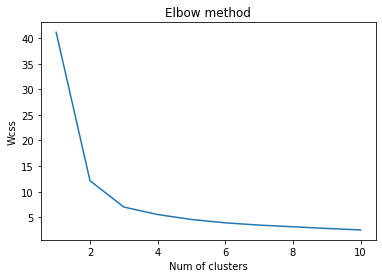

In [23]:
#Finding the optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("Num of clusters")
plt.ylabel("Wcss")
plt.show()

In [24]:
kmeans= KMeans(n_clusters=3, init="k-means++",max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [25]:
data['cluster']=y_kmeans

In [26]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,2
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,1
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,2
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,2


In [27]:
data.drop(['Species'], axis='columns', inplace=True)

In [28]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [29]:
df1=data[data.cluster==0]

In [30]:
df2=data[data.cluster==1]
df3=data[data.cluster==2]

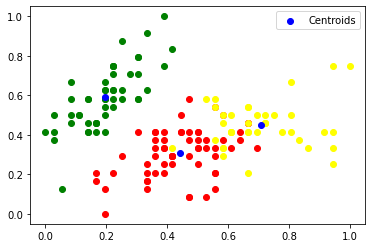

In [31]:
plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm, color="green")
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm, color="red")
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm, color="yellow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color = 'blue', label = 'Centroids')
plt.legend()

## Specific to Assignment 4

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [63]:
data1=np.array([[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]])

In [64]:
data1.shape

(8, 2)

In [65]:
column_values=["x","y"]

In [67]:
dataset=pd.DataFrame(data=data1, columns=column_values)

In [68]:
dataset

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [69]:
c_x=np.array([0.1,0.3])
c_y=np.array([0.6,0.2])

In [70]:
init_centroids=np.array(list(zip(c_x,c_y)))

In [71]:
init_centroids

array([[0.1, 0.6],
       [0.3, 0.2]])

In [72]:
kmeans= KMeans(n_clusters=2, init=init_centroids, max_iter=300, n_init=10, random_state=0)

In [74]:
y_means=kmeans.fit_predict(dataset)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [75]:
kmeans.cluster_centers_

array([[0.148     , 0.712     ],
       [0.24666667, 0.2       ]])

In [76]:
y_means

array([0, 0, 0, 0, 1, 0, 1, 1])

In [77]:
dataset['cluster']=y_means

In [78]:
dataset

,x,y,cluster
0,0.10,0.60,0
1,0.15,0.71,0
2,0.08,0.90,0
3,0.16,0.85,0
4,0.20,0.30,1
5,0.25,0.50,0
6,0.24,0.10,1
7,0.30,0.20,1


In [79]:
df1=dataset[dataset.cluster==0]
df2=dataset[dataset.cluster==1]

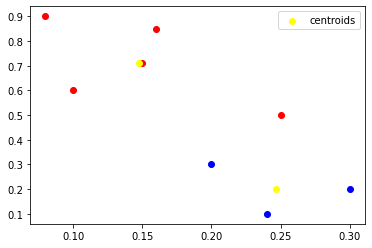

In [80]:
plt.scatter(df1.x,df1.y, color="red")
plt.scatter(df2.x,df2.y, color="blue")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color="yellow", label="centroids")
plt.legend()

In [82]:
kmeans.predict([[0.25, 0.50]])

array([0])

In [85]:
print("Population of cluster around m2: ",len(dataset[dataset.cluster == 1]))

Population of cluster around m2:  3


In [87]:
print("Updated value of cluster centroids : \n",kmeans.cluster_centers_)

Updated value of cluster centroids : 
 [[0.148      0.712     ]
 [0.24666667 0.2       ]]


## Attempt 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=np.array([[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]])

In [3]:
data.shape

(8, 2)

In [4]:
dataset=pd.DataFrame(data,columns=["x","y"])

In [5]:
dataset

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


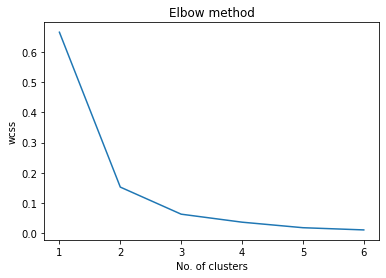

In [6]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=50, n_init=10, random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,7), wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [7]:
c_x=np.array([0.1,0.3])
c_y=np.array([0.6,0.2])

In [8]:
centroids=np.array(list(zip(c_x,c_y)))

In [9]:
centroids

array([[0.1, 0.6],
       [0.3, 0.2]])

In [10]:
kmeans=KMeans(n_clusters=2, init=centroids, max_iter=300, n_init=10, random_state=0)

In [11]:
y_means=kmeans.fit_predict(dataset)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [12]:
y_means

array([0, 0, 0, 0, 1, 0, 1, 1])

In [13]:
dataset["cluster"]=y_means

In [14]:
dataset

,x,y,cluster
0,0.10,0.60,0
1,0.15,0.71,0
2,0.08,0.90,0
3,0.16,0.85,0
4,0.20,0.30,1
5,0.25,0.50,0
6,0.24,0.10,1
7,0.30,0.20,1


In [15]:
df1=dataset[dataset.cluster==0]
df2=dataset[dataset.cluster==1]

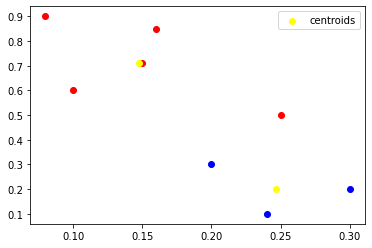

In [16]:
plt.scatter(df1.x, df1.y, color="red")
plt.scatter(df2.x,df2.y, color="blue")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow", label="centroids")
plt.legend()

In [17]:
kmeans.predict([[0.25,0.5]])

array([0])

In [18]:
len(dataset[dataset.cluster==1])

3

In [20]:
print("Initial values of centroids: \n",centroids)

Initial values of centroids: 
 [[0.1 0.6]
 [0.3 0.2]]


In [21]:
print("Updated values of cenrtroids: \n", kmeans.cluster_centers_)

Updated values of cenrtroids: 
 [[0.148      0.712     ]
 [0.24666667 0.2       ]]
